<a href="https://www.kaggle.com/code/mltheaiengineer/badges-michael-lorenz?scriptVersionId=233162247" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

--- Starting Data Parsing ---
Parsing Google Cloud Skills Boost static text...
Parsed 47 entries from Google text.
Parsing Microsoft Learn static text...
Extracted summary from text: 107 MS Badges, 17 MS Trophies.
Parsed 105 entries from Microsoft text (105 Badges).
         -> Check if text contains all 'Badge' entries or adjust parsing logic.

NOTE: Removed 1 entry/entries with future or invalid dates.


--- Parsed Achievements (Static Data) ---
Source: User-provided text dump (Data date requires verification)
Total Parsed & Valid Entries: 151
Explicit Counts from MS Text Header: 107 Badges, 17 Trophies.

Achievements Log (Latest First):
 Platform  Type                                                                                         Title Completion Date
Microsoft Badge                                                               The treasure hunt for AI skills      2025-04-09
Microsoft Badge                                              Describe analytics capabilities of Micr

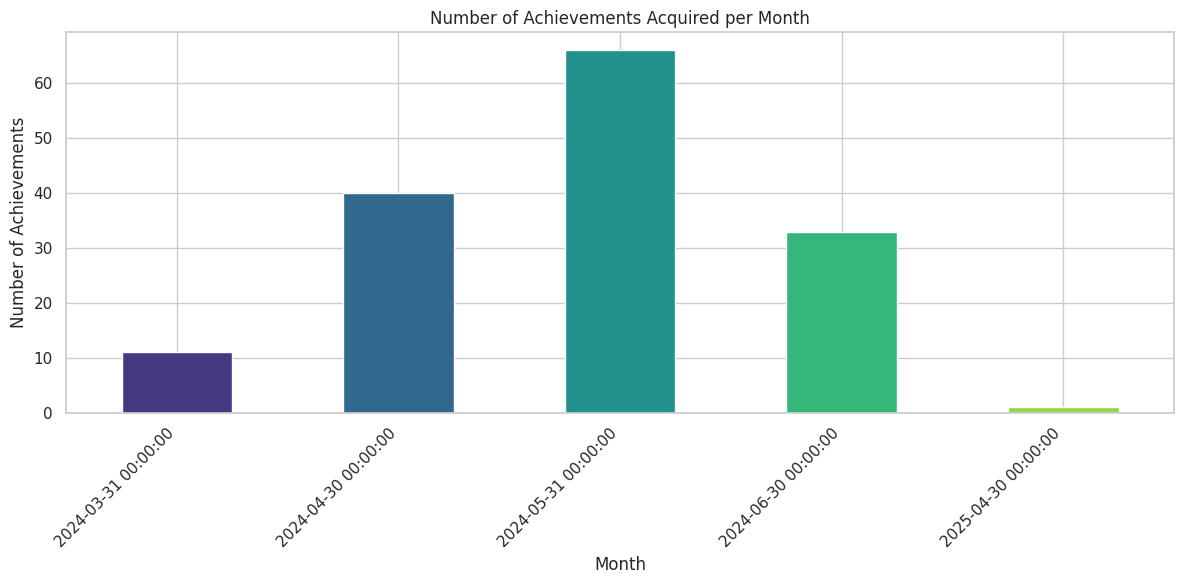

Plot saved: cumulative_achievements.png


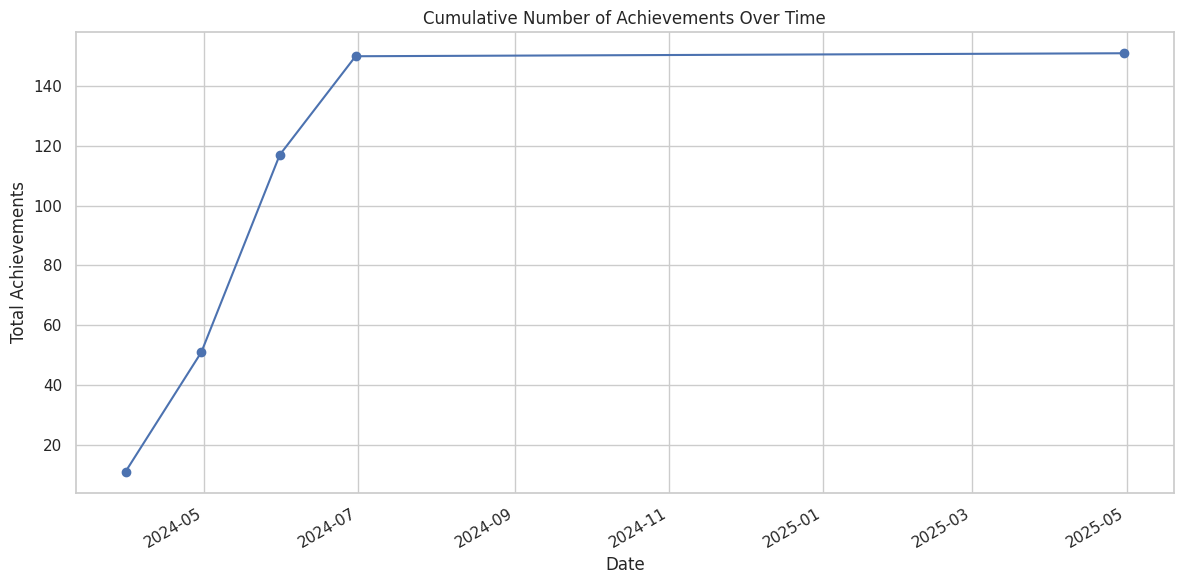


--- 2. Skill Distribution & Platform Comparison ---
Plot saved: skill_distribution_overall.png


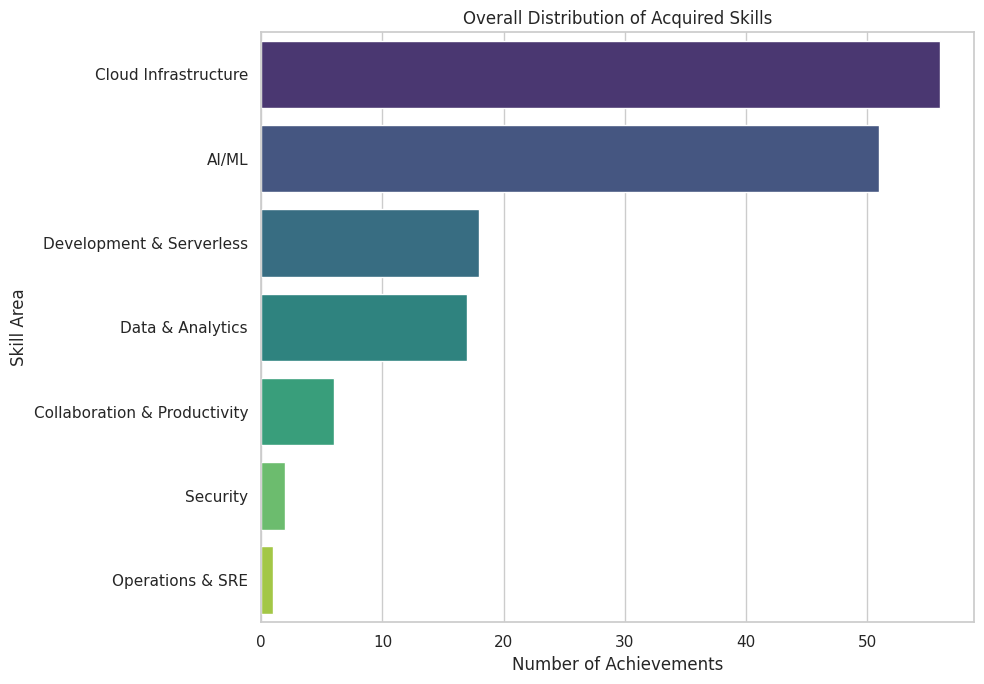


Crosstab: Skills per Platform
platform                      Google  Microsoft
Skill Area                                     
AI/ML                             31         20
Cloud Infrastructure              15         41
Collaboration & Productivity       0          6
Data & Analytics                   0         17
Development & Serverless           0         18
Operations & SRE                   1          0
Security                           0          2
Plot saved: platform_skill_heatmap.png


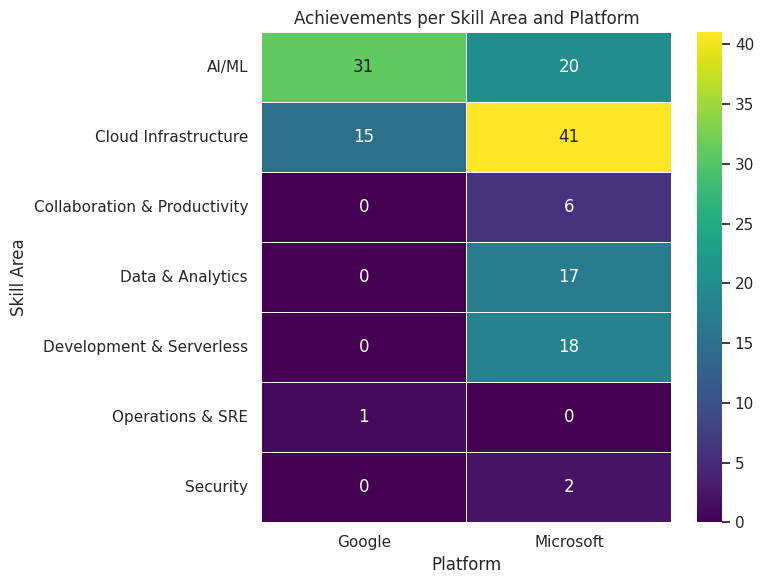

Plot saved: platform_skill_stacked_bar.png


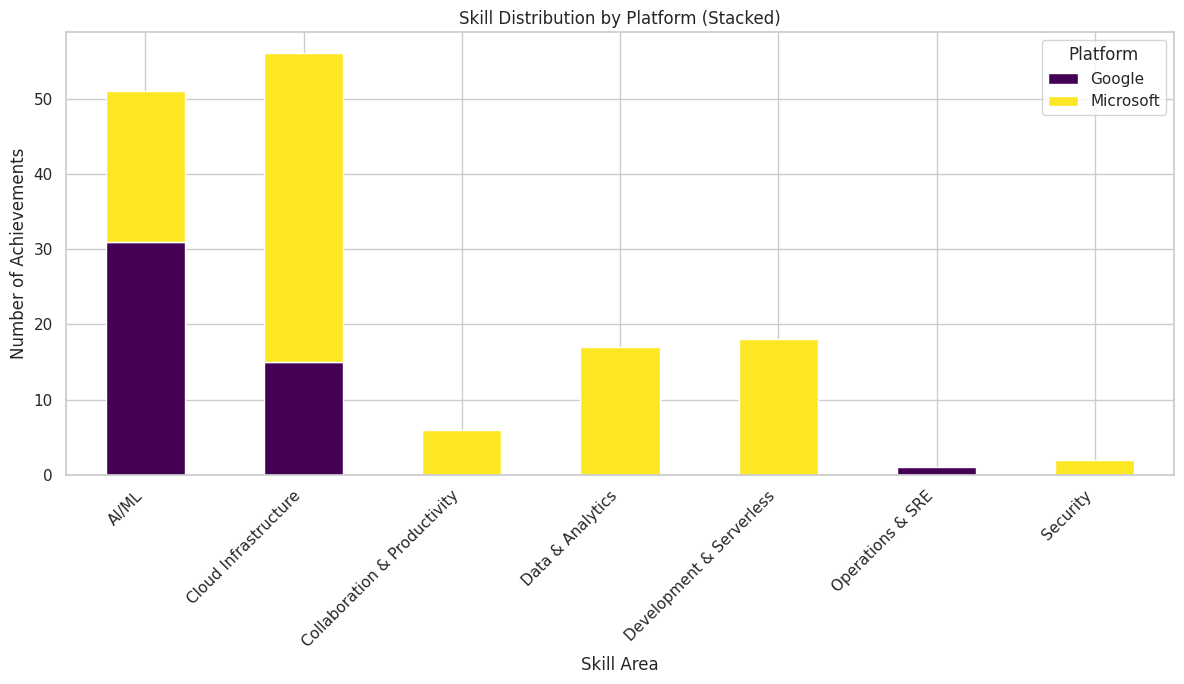


--- 3. Skill Focus Over Time ---

Percentage share of skill areas per month calculated.
Plot saved: skill_focus_area.png


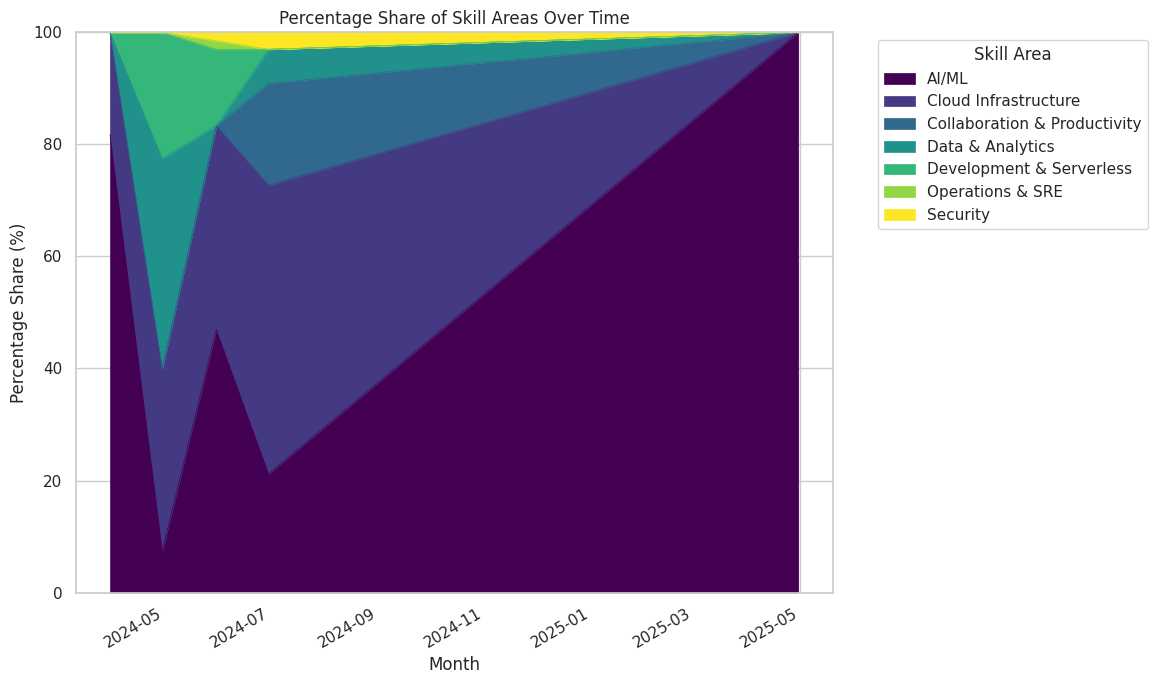


--- 4. Time Between Consecutive Achievements ---

Statistics for Time Between Achievements (in days):
count    150.000000
mean       2.666667
std       24.484392
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      300.000000
Name: date_obj, dtype: float64
Plot saved: time_between_achievements_hist.png


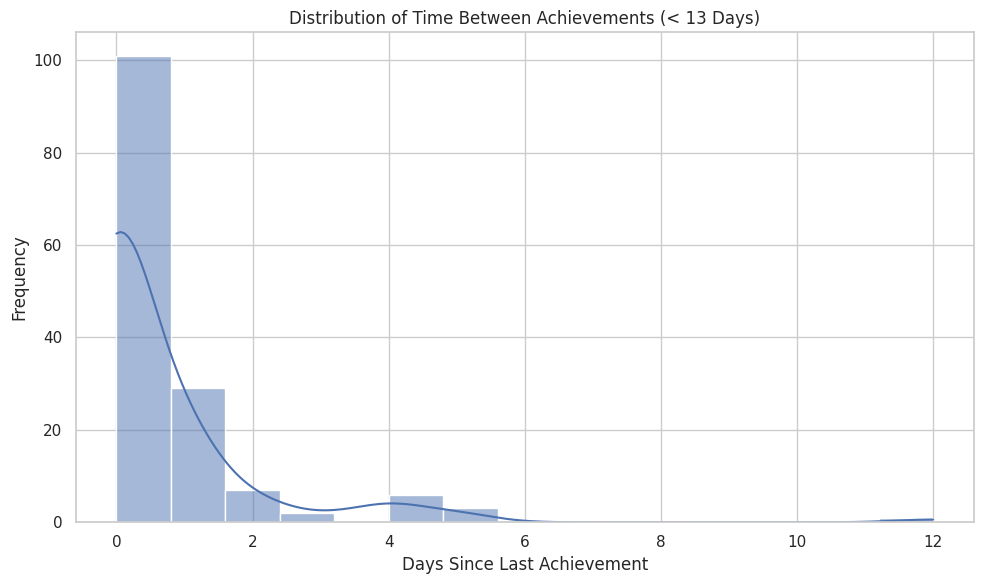



--- 5. Machine Learning: Skill Area Prediction from Title ---

Preparing data for Machine Learning...
Data split into 113 training and 38 test samples.
Training the classification model...
Evaluating the model on the test set...

Model Accuracy on Test Set: 81.58%

Classification Report:
                              precision    recall  f1-score   support

                       AI/ML       0.93      0.76      0.84        17
        Cloud Infrastructure       0.75      1.00      0.86        15
Collaboration & Productivity       0.00      0.00      0.00         1
            Data & Analytics       0.67      0.67      0.67         3
    Development & Serverless       1.00      0.50      0.67         2

                    accuracy                           0.82        38
                   macro avg       0.67      0.59      0.61        38
                weighted avg       0.82      0.82      0.80        38


Confusion Matrix:
Plot saved: skill_prediction_confusion_matrix.png


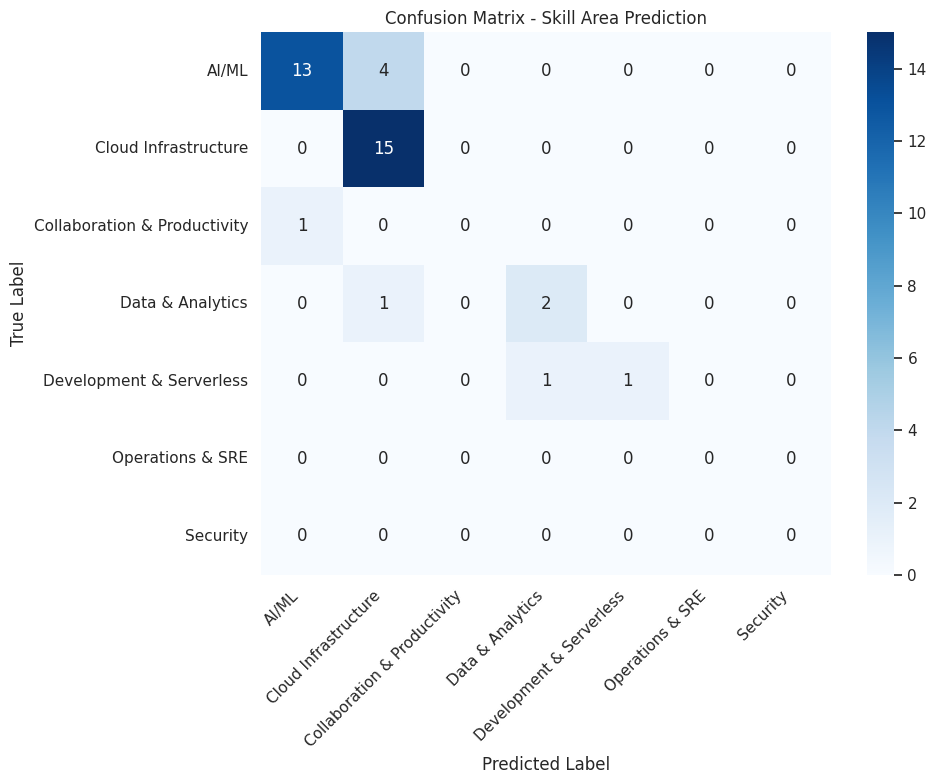


Example Prediction:
Predicted Skill Area for 'Introduction to Machine Learning with Python and Scikit-learn': AI/ML


--- Personalized Data Interpretation & Fazit ---
Analysis based on 151 parsed and validated achievements for Michael Lorenz.

Key Findings & Interpretation:
-------------------------------------------------
* **High Learning Velocity & Engagement:** The dataset (151 validated entries) shows significant learning activity concentrated over specific periods, peaking with 66 in 2024-05. The median time of 0 days between achievements indicates intense learning phases with frequent completions, demonstrating strong commitment and drive.
* **Strategic Skill Focus (Cloud & AI/ML):** The analysis reveals a clear dual focus on Cloud Infrastructure (37.1%) and AI/ML (33.8%). This quantitative evidence aligns with an M.Sc. background in AI/Computational Engineering and demonstrates the development of both specialized AI/ML knowledge and essential Cloud Infrastructure foundations. 

In [1]:
# --- Introduction ---
# Purpose: This script parses public achievement data copied from Microsoft Learn
#          and Google Cloud Skills Boost profiles. It then analyzes and visualizes
#          this learning data to extract insights about learning patterns and skill focus.
#          Includes a Machine Learning component to predict skill areas from titles.
# Goal: Demonstrate data analysis skills using Python, including text parsing (Regex),
#       data manipulation (Pandas), data visualization (Matplotlib, Seaborn), basic
#       time series analysis, and introductory NLP/Machine Learning (TF-IDF, Classification)
#       with Scikit-learn. Serves as a portfolio project for skills tracking and
#       learning analytics based on publicly available data for Michael Lorenz.
# Methodology:
#   1. Parse raw text dumps using Regular Expressions.
#   2. Structure data into a Pandas DataFrame.
#   3. Convert dates and assign skill areas based on keywords (heuristic labels).
#   4. Perform Exploratory Data Analysis (EDA):
#      - Temporal analysis (achievements per month, cumulative).
#      - Skill distribution (overall, per platform).
#      - Skill focus changes over time.
#      - Analysis of time gaps between learning activities.
#   5. Apply Machine Learning: Train a classifier (e.g., Naive Bayes) using TF-IDF
#      features from titles to predict the heuristically assigned 'Skill Area'. Evaluate model performance.
#   6. Visualize results using Matplotlib and Seaborn.
#   7. Save the processed data and plots.
# Keywords: Python, Pandas, Data Analysis, Data Science, Web Scraping (Text Parsing),
#           Microsoft Learn, Google Cloud Skills Boost, Achievements, Badges,
#           Data Visualization, Matplotlib, Seaborn, Skills Tracking, Learning Analytics,
#           Portfolio Project, EDA, Time Series Analysis, Regex, Machine Learning, ML,
#           NLP, Natural Language Processing, TF-IDF, Text Classification, Scikit-learn,
#           Naive Bayes, Logistic Regression, Michael Lorenz.
# Disclaimer: The parsing functions rely on the specific text format copied from the
#             profile pages (as of approx. mid-2024/early 2025). Changes to the website
#             layout may break the parsers. Skill categorization is heuristic based on keywords.
#             The ML model's quality depends on these heuristic labels.

import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np # For potential NaN handling in ML part

# ML Imports from Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression # Alternative classifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional: from typing import List, Dict, Tuple, Optional # For older Python versions < 3.9

# --- Constants ---
# Skill Assessment & General Strings
SKILL_AREA_OTHER = "Other/General"
INVALID_DATE_STR = "Invalid Date Format"
PARSING_ERROR_STR = "Parsing Error"

# Percentile Tiers (Arbitrary thresholds for engagement estimation)
PERCENTILE_TIER_FOUNDATIONAL = 10
PERCENTILE_TIER_INTERMEDIATE = 50
PERCENTILE_TIER_STRONG = 100
PERCENTILE_TIER_VERY_STRONG = 150

# Output Filenames for saved artifacts
OUTPUT_CSV_FILE = 'achievements_analysis.csv'
PLOT_ACHIEVEMENTS_PER_MONTH = 'achievements_per_month.png'
PLOT_CUMULATIVE_ACHIEVEMENTS = 'cumulative_achievements.png'
PLOT_SKILL_DISTRIBUTION_OVERALL = 'skill_distribution_overall.png'
PLOT_PLATFORM_SKILL_HEATMAP = 'platform_skill_heatmap.png'
PLOT_PLATFORM_SKILL_STACKED_BAR = 'platform_skill_stacked_bar.png'
PLOT_SKILL_FOCUS_AREA = 'skill_focus_area.png'
PLOT_TIME_BETWEEN_ACHIEVEMENTS = 'time_between_achievements_hist.png'
PLOT_CONFUSION_MATRIX = 'skill_prediction_confusion_matrix.png' # Filename for CM plot

# --- Optional: Set Seaborn style for plots ---
sns.set_theme(style="whitegrid")

# --- Optional: Suppress specific Seaborn FutureWarning ---
# This warning doesn't break functionality but can clutter the output.
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# --- Compiled Regex Patterns ---
google_pattern = re.compile(
    r"^(?!(?:Earned|\s*$|Weitere Informationen|Teilnehmen|Anmelden|Mitglied seit|help_outline|Michael Lorenz))(.+)\nEarned\s+(.+?)\s+(?:EDT|EST)",
    re.MULTILINE
)
# Regex for Microsoft date format MM/DD/YYYY or M/D/YYYY
ms_date_pattern = re.compile(r'(\d{1,2}/\d{1,2}/\d{4})')


# --- Optimized Parsing Function for Google Cloud Skills Boost ---
def parse_google_text(raw_text: str) -> list[dict]:
    """
    Parses Google Cloud Skills Boost text to extract achievement titles and dates.
    Uses a pre-defined regex pattern and maps month names to numbers.
    """
    print("Parsing Google Cloud Skills Boost static text...")
    badges = []
    # Mapping for English and German month abbreviations
    month_map = {
        "Jan": 1, "Feb": 2, "Mär": 3, "Mar": 3, "Apr": 4, "Mai": 5, "May": 5,
        "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Okt": 10, "Oct": 10, "Nov": 11, "Dez": 12, "Dec": 12
    }

    for match in google_pattern.finditer(raw_text):
        title = match.group(1).strip()
        date_str_raw = match.group(2).strip()
        date_str_formatted = INVALID_DATE_STR # Default if parsing fails

        # Try parsing the extracted date string (e.g., "Jun 2, 2024")
        try:
            parts = date_str_raw.replace(',', '').split()
            if len(parts) == 3 and parts[0] in month_map:
                day = int(parts[1])
                month = month_map[parts[0]]
                year = int(parts[2])
                date_obj = datetime(year, month, day)
                date_str_formatted = date_obj.strftime('%Y-%m-%d') # Standard ISO format
        except (ValueError, IndexError) as e:
            # Catch potential errors during date conversion
            print(f"Warning: Could not parse Google date '{date_str_raw}' for title '{title}'. Error: {e}")
            date_str_formatted = PARSING_ERROR_STR

        # Add entry if title seems valid (simple check)
        if "Michael Lorenz" not in title: # Avoid accidentally parsing profile name
            badges.append({'title': title, 'date': date_str_formatted, 'platform': 'Google'})

    print(f"Parsed {len(badges)} entries from Google text.")
    return badges

# --- Optimized Parsing Function for Microsoft Learn (Improved Robustness - v4 Final) ---
def parse_microsoft_text(raw_text: str) -> tuple[list[dict], int, int]:
    """
    Parses Microsoft Learn text (English format), extracts title, type, date,
    badge, and trophy counts from summary. Handles date potentially appearing
    on the same line as 'Completed on', the next line, OR if 'Completed on'
    is directly appended to the title.
    """
    print("Parsing Microsoft Learn static text...")

    ms_badge_count = 0; ms_trophy_count = 0
    match_badges = re.search(r"Badges\s+(\d+)", raw_text, re.IGNORECASE)
    match_trophies = re.search(r"Trophies\s+(\d+)", raw_text, re.IGNORECASE) # Look for "Trophies"
    if match_badges: ms_badge_count = int(match_badges.group(1))
    if match_trophies: ms_trophy_count = int(match_trophies.group(1))
    print(f"Extracted summary from text: {ms_badge_count} MS Badges, {ms_trophy_count} MS Trophies.")

    achievements = []
    # Split text into non-empty lines, stripping whitespace
    lines = [line.strip() for line in raw_text.split('\n') if line.strip()]
    i = 0 # Line index
    while i < len(lines):
        line = lines[i]
        # Check if the line indicates the start of an achievement entry (e.g., "Badge")
        if line.lower() in ["badge"]: # Primarily looking for "Badge" now
            entry_type = line.capitalize()
            # Expect title on the next line
            if i + 1 < len(lines):
                title = lines[i + 1]
                original_title = title # Backup for error messages
                date_str_formatted = INVALID_DATE_STR # Default date status
                next_i = i + 2 # Default jump: assume title is clean, look for date below

                # --- Check for "Completed on" within the title line itself ---
                title_lower_check = title.lower()
                date_match = None
                date_found_in_title = False
                if "completed on" in title_lower_check:
                     # Try to extract date from the part *after* "Completed on" in the title line
                     parts = re.split(r'completed on', title, maxsplit=1, flags=re.IGNORECASE)
                     title = parts[0].strip() # Clean title regardless of date find
                     if len(parts) > 1:
                         date_match = ms_date_pattern.search(parts[1]) # Search in the remainder

                     if date_match: # Date found within title line
                         date_str = date_match.group(1)
                         try:
                             date_obj = datetime.strptime(date_str, '%m/%d/%Y')
                             date_str_formatted = date_obj.strftime('%Y-%m-%d')
                             date_found_in_title = True # Date successfully parsed from title line
                         except ValueError:
                             print(f"Warning: Could not parse Microsoft date '{date_str}' found in title line for '{original_title}'.")
                             date_str_formatted = PARSING_ERROR_STR
                             # Although parsing failed, we consider the date block 'handled' for this line
                             date_found_in_title = True # Mark attempt even if parsing failed
                     # Adjust index as we processed this title line anyway
                     next_i = i + 2

                # --- Search for date in subsequent lines (only if not found/parsed in title line) ---
                if not date_found_in_title: # Only search if not found above
                    j = i + 2 # Start search from the line after the (potentially cleaned) title
                    processed_date_block = False
                    while j < len(lines):
                        date_found_on_line = -1
                        current_line_lower = lines[j].lower()
                        date_match_subsequent = None

                        # Check if this line *starts with* "Completed on"
                        if current_line_lower.startswith("completed on"):
                            processed_date_block = True # Mark that we found the block starter
                            # Attempt 1: Find date on the *same* line (after "Completed on")
                            split_parts = re.split(r'completed on', lines[j], maxsplit=1, flags=re.IGNORECASE)
                            if len(split_parts) > 1:
                                date_match_subsequent = ms_date_pattern.search(split_parts[1])
                            if date_match_subsequent:
                                date_found_on_line = 0
                            else:
                                # Attempt 2: Find date on the *next* line
                                if j + 1 < len(lines):
                                    date_match_next = ms_date_pattern.search(lines[j+1])
                                    if date_match_next:
                                        date_match_subsequent = date_match_next
                                        date_found_on_line = 1

                            # Process if date found
                            if date_match_subsequent:
                                date_str = date_match_subsequent.group(1)
                                try:
                                    date_obj = datetime.strptime(date_str, '%m/%d/%Y')
                                    date_str_formatted = date_obj.strftime('%Y-%m-%d')
                                except ValueError:
                                    print(f"Warning: Could not parse Microsoft date '{date_str}' for title '{title}'.")
                                    date_str_formatted = PARSING_ERROR_STR

                            # Adjust jump index based on where date was found
                            if date_found_on_line == 0: next_i = j + 1 # Jump over "Completed on" line
                            elif date_found_on_line == 1: next_i = j + 2 # Jump over "Completed on" and date line
                            else: next_i = j + 1 # Skip "Completed on" line if no date found

                            break # Exit inner loop once "Completed on" line processed

                        # Break inner loop if next badge starts
                        if lines[j].lower() in ["badge"]:
                            next_i = j # Jump to the start of that badge line
                            break
                        j += 1 # Next line in inner loop
                    # If inner loop finished without finding "Completed on", ensure index advances
                    if not processed_date_block:
                        next_i = j


                # Append achievement
                achievements.append({
                    'title': title, 'date': date_str_formatted,
                    'type': entry_type, 'platform': 'Microsoft'
                })
                i = next_i # Set outer loop index
                continue # Continue outer loop
            else: i += 1 # Skip badge line if no title follows
        else: i += 1 # Move to next line if not a badge line

    # --- Final Counts and Warnings ---
    parsed_badge_count = len([a for a in achievements if a.get('type') == 'Badge'])
    print(f"Parsed {len(achievements)} entries from Microsoft text ({parsed_badge_count} Badges).")
    if parsed_badge_count != ms_badge_count:
        print(f"Warning: Parsed {parsed_badge_count} MS Badges, but summary reported {ms_badge_count}. Parsing might be incomplete or summary inaccurate.")
        print("         -> Check if text contains all 'Badge' entries or adjust parsing logic.")
    return achievements, ms_badge_count, ms_trophy_count


# --- Keyword Map and Skill Assignment Function ---
keywords_map = {
    "AI/ML": ["AI", "Artificial Intelligence", "Machine Learning", "ML", "Deep Learning", "NLP", "GenAI", "Vertex", "Gemini", "LLM", "Large Language", "Image Generation", "Encoder-Decoder", "Attention", "Transformer", "BERT", "Prompt Design", "MLOps", "Copilot", "KI", "Regression", "Azure Machine Learning", "Grundlagen der generativen KI", "Azure Quantum"],
    "Cloud Infrastructure": ["Cloud", "Compute", "Kubernetes", "GKE", "Networking", "VPC", "Storage", "Infrastructure", "Azure Virtual Machines", "Azure Networking", "Migration", "Azure-Grundlagen", "Azure-Architektur", "VM", "Load Balanc", "Kerninfrastruktur", "Azure Resource Manager", "Azure Cloud Shell", "HPC", "VMware", "Azure Sphere", "IoT", "Azure-Computer", "Netzwerk", "Linux in Azure", "Azure Load Balancer", "Azure"],
    "Data & Analytics": ["Data", "BigQuery", "SQL", "Analytics", "Dataproc", "Dataflow", "Looker", "Power BI", "Fabric", "Synapse", "Database", "Warehouse", "Azure-Daten", "Datenanalyse", "Datenspeicher", "Azure Data Lake", "Datentechnik", "Purview", "Datenkonzepte", "Viva Insights", "Azure SQL", "Blob Storage", "Azure-Speicherkont", "Speicherung von Daten", "Azure SQL Edge", "Moderne Analysen", "Relationale Daten"],
    "Security": ["Security", "IAM", "Identity", "Compliance", "Defender", "Sentinel", "Secrets", "Firewall", "Responsible AI", "Trust and Security", "Entra ID", "Netzwerksicherheit", "Sichern von Identitäten"],
    "Development & Serverless": ["App Engine", "Cloud Functions", "Serverless", "API", "Development", "Coding", "Azure Functions", "App Service", "SDK", "Anwendungsentwicklung", "Streamlit", "Python", "MEAN-Stapel", "Docker", "SaaS", "Visual Studio Code", "Git", "GitHub", "Power Platform", "PowerShell", "CLI", "Bash", "Power Pages"],
    "Operations & SRE": ["DevOps", "SRE", "Cloud Build", "Cloud Deploy", "Monitoring", "Logging", "Operations", "Azure DevOps", "Cloud Operations", "Überwachungstools", "Kostenmanagement", "Cloud Adoption Framework", "Azure-Aufgaben", "Bereitstellen von Azure-Ressourcen"],
    "Collaboration & Productivity": ["Workspace", "M365", "Microsoft 365", "Teams", "SharePoint", "Meet", "Sheets", "Slides", "Docs", "Gmail"],
    "Certification/Fundamentals": ["Certificate", "Certification", "Fundamentals", "Grundlagen", "Einführung", "Introduction", "Foundations", "AZ-104", "MS-900", "Einsteiger", "Erste Schritte", "Get started", "Intro"],
}

def assign_skill_area(title: str | None) -> str:
    """Assigns a skill area to an achievement title based on keywords_map."""
    if pd.isna(title):
        return SKILL_AREA_OTHER
    title_lower = title.lower()
    for area, keys in keywords_map.items():
        if any(key.lower() in title_lower for key in keys):
            return area
    return SKILL_AREA_OTHER


# --- Example Input Data ---
# NOTE: Replace with your current data if necessary. 
# source: Google Cloud Skills Boost
# https://www.cloudskillsboost.google/public_profiles/ad995a21-5bb3-4e9a-9a07-f2f22fe4c0fa
print("--- Starting Data Parsing ---")
google_raw_text = """
help_outline



Teilnehmen
Anmelden
Michael Lorenz
Mitglied seit 2024

Data Management and Storage in the Cloud
Earned Jun 2 2024 EDT
Weitere Informationen
Developing a Google SRE Culture
Earned Mai 20 2024 EDT
Weitere Informationen
Preparing for Your Professional Cloud Network Engineer Journey
Earned Mai 19 2024 EDT
Weitere Informationen
Gemini in Google Meet
Earned Mai 19 2024 EDT
Weitere Informationen
Gemini in Google Sheets
Earned Mai 19 2024 EDT
Weitere Informationen
Gemini in Google Slides
Earned Mai 19 2024 EDT
Weitere Informationen
Gemini in Google Docs
Earned Mai 19 2024 EDT
Weitere Informationen
Gemini in Gmail
Earned Mai 19 2024 EDT
Weitere Informationen
Introduction to Data Analytics in Google Cloud
Earned Mai 14 2024 EDT
Weitere Informationen
Gemini for end-to-end SDLC - Deutsch
Earned Mai 10 2024 EDT
Weitere Informationen
Einführung in die Datenanalyse in Google Cloud
Earned Mai 9 2024 EDT
Weitere Informationen
Introduction to Gemini for Google Workspace
Earned Mai 9 2024 EDT
Weitere Informationen
Gemini for DevOps Engineers - Deutsch
Earned Mai 9 2024 EDT
Weitere Informationen
Gemini for Security Engineers - Deutsch
Earned Mai 9 2024 EDT
Weitere Informationen
Gemini for Network Engineers - Deutsch
Earned Mai 8 2024 EDT
Weitere Informationen
Gemini for Cloud Architects - Deutsch
Earned Mai 8 2024 EDT
Weitere Informationen
Gemini for Application Developers - Deutsch
Earned Mai 8 2024 EDT
Weitere Informationen
Transformer Models and BERT Model - Deutsch
Earned Mai 8 2024 EDT
Weitere Informationen
Encoder-Decoder Architecture - Deutsch
Earned Mai 8 2024 EDT
Weitere Informationen
Machine Learning Operations (MLOps) for Generative AI - Deutsch
Earned Mai 6 2024 EDT
Weitere Informationen
Attention Mechanism - Deutsch
Earned Mai 6 2024 EDT
Weitere Informationen
Google Cloud Computing Foundations: Data, ML, and AI in Google Cloud
Earned Mai 6 2024 EDT
Weitere Informationen
Google Cloud Computing Foundations: Infrastructure in Google Cloud
Earned Mai 6 2024 EDT
Weitere Informationen
Gemini for Data Scientists and Analysts - Deutsch
Earned Mai 6 2024 EDT
Weitere Informationen
Google Cloud Fundamentals for AWS Professionals
Earned Mai 5 2024 EDT
Weitere Informationen
Google Cloud Big Data and Machine Learning Fundamentals
Earned Mai 5 2024 EDT
Weitere Informationen
Google Cloud Computing Foundations: Cloud Computing Fundamentals
Earned Mai 5 2024 EDT
Weitere Informationen
Umgebung für die Anwendungsentwicklung in Google Cloud einrichten
Earned Mai 5 2024 EDT
Weitere Informationen
Google Cloud-Grundlagen: Kerninfrastruktur
Earned Mai 3 2024 EDT
Weitere Informationen
Implement Load Balancing on Compute Engine
Earned Mai 3 2024 EDT
Weitere Informationen
Introduction to Vertex AI Studio - Deutsch
Earned Mai 3 2024 EDT
Weitere Informationen
Introduction to Image Generation - Deutsch
Earned Mai 2 2024 EDT
Weitere Informationen
Prompt Design in Vertex AI
Earned Mai 1 2024 EDT
Weitere Informationen
Innovating with Google Cloud Artificial Intelligence
Earned Apr 22 2024 EDT
Weitere Informationen
Scaling with Google Cloud Operations
Earned Apr 21 2024 EDT
Weitere Informationen
Trust and Security with Google Cloud
Earned Apr 21 2024 EDT
Weitere Informationen
Infrastructure and Application Modernization with Google Cloud
Earned Apr 8 2024 EDT
Weitere Informationen
Exploring Data Transformation with Google Cloud
Earned Mär 23 2024 EDT
Weitere Informationen
Launching into Machine Learning
Earned Mär 20 2024 EDT
Weitere Informationen
Digital Transformation with Google Cloud
Earned Mär 15 2024 EDT
Weitere Informationen
Introduction to AI and Machine Learning on Google Cloud - Deutsch
Earned Mär 11 2024 EDT
Weitere Informationen
Responsible AI: Applying AI Principles with Google Cloud - Deutsch
Earned Mär 6 2024 EST
Weitere Informationen
Generative AI Fundamentals
Earned Mär 6 2024 EST
Weitere Informationen
Introduction to Gemini for Google Workspace
Earned Mär 5 2024 EST
Weitere Informationen
Introduction to Responsible AI - Deutsch
Earned Mär 5 2024 EST
Weitere Informationen
Introduction to Large Language Models - Deutsch
Earned Mär 5 2024 EST
Weitere Informationen
Introduction to Generative AI - Deutsch
Earned Mär 5 2024 EST
""" # Closing quote at level 0

# source: Microsoft Learn
# https://learn.microsoft.com/en-us/users/artificial-intelligence/

microsoft_raw_text = """
Skip to main content


Learn
Discover
Product documentation
Development languages
Topics








Michael Lorenz, M.Sc. AI youtube.com/@ML_and_AI
# EMAIL REMOVED FROM HERE
Badges
107
Trophies
17
Reputation points
0
Accepted answers
0
Following
0
Followers
0
Level 11
165,625/227,799 XP
Activity
Training
Plans
Challenges
Credentials
Q&A
Achievements
Collections
Transcript
Achievements
Have an achievement code? Redeem your code now.
Modules
Learning Paths
Courses
Plans
Challenges
Other

Print your achievement

Badge

The treasure hunt for AI skills
Completed on
4/9/2025
Module assessment passed

Print your achievement

Badge

Analyze your Microsoft 365 workplace data using Microsoft Viva Insights
Completed on
6/13/2024

Print your achievement

Badge

Describe support offerings for Microsoft 365 services
Completed on
6/13/2024

Print your achievement

Badge

Describe Microsoft 365 pricing, licensing, and billing options
Completed on
6/13/2024

Print your achievement

Badge

Describe analytics capabilities of Microsoft 365
Completed on
6/13/2024

Print your achievement

Badge

Describe endpoint modernization, management concepts, and deployment options in Microsoft 365
Completed on
6/13/2024

Print your achievement

Badge

Describe collaboration solutions of Microsoft 365
Completed on
6/13/2024

Print your achievement

Badge

Optimize and extend Copilot for Microsoft 365
Completed on
6/11/2024

Print your achievement

Badge

Scale AI in your organization
Completed on
6/11/2024

Print your achievement

Badge

Embrace responsible AI principles and practices
Completed on
6/11/2024

Print your achievement

Badge

Create business value from AI
Completed on
6/11/2024

Print your achievement

Badge

Leverage AI tools and resources for your business
Completed on
6/11/2024

Print your achievement

Badge

Describe productivity solutions of Microsoft 365
Completed on
6/7/2024

Print your achievement

Badge

What is Microsoft 365?
Completed on
6/7/2024

Print your achievement

Badge

Train and evaluate regression models
Completed on
6/7/2024

Print your achievement

Badge

Introduction to Azure SQL
Completed on
6/6/2024

Print your achievement

Badge

Explore Azure Blob storage
Completed on
6/6/2024

Print your achievement

Badge

Innovate applications by using Azure cloud technologies
Completed on
6/5/2024

Print your achievement

Badge

Introduction to Azure Sphere
Completed on
6/5/2024

Print your achievement

Badge

Introduction to MLOps for IoT Edge
Completed on
6/5/2024

Print your achievement

Badge

Introduction to Azure IoT Edge
Completed on
6/5/2024

Print your achievement

Badge

Introduction to Azure IoT Hub
Completed on
6/4/2024

Print your achievement

Badge

Introduction to Azure IoTCompleted on
6/4/2024

Print your achievement

Badge

Introduction to Azure Functions for IoT
Completed on
6/4/2024

Print your achievement

Badge

Build and run a web application with the MEAN stack on an Azure Linux virtual machine
Completed on
6/4/2024

Print your achievement

Badge

Provisioning a Linux virtual machine in Microsoft Azure
Completed on
6/4/2024

Print your achievement

Badge

Create a Windows virtual machine in Azure
Completed on
6/4/2024

Print your achievement

Badge

Choose the right disk storage for your virtual machine workload
Completed on
6/4/2024

Print your achievement

Badge

Create an Azure Storage account
Completed on
6/3/2024

Print your achievement

Badge

Choose a data storage approach in Azure
Completed on
6/3/2024

Print your achievement

Badge

Secure your identities by using Microsoft Entra ID
Completed on
6/3/2024

Print your achievement

Badge

Automate Azure tasks using scripts with PowerShell
Completed on
6/3/2024

Print your achievement

Badge

Control Azure services with the CLI
Completed on
6/3/2024

Print your achievement

Badge

Introduction to Linux on Azure
Completed on
6/3/2024

Print your achievement

Badge

Plan your Linux environment in Azure
Completed on
5/29/2024

Print your achievement

Badge

Introduction to Azure Kubernetes Service
Completed on
5/29/2024

Print your achievement

Badge

Introduction to Docker containers
Completed on
5/29/2024

Print your achievement

Badge

Introduction to quantum computing with Azure Quantum
Completed on
5/29/2024

Print your achievement

Badge

Technical foundations of SaaS
Completed on
5/28/2024

Print your achievement

Badge

Foundations of SaaS
Completed on
5/28/2024

Print your achievement

Badge

Python error handling
Completed on
5/28/2024

Print your achievement

Badge

Introduction to Azure SQL Edge
Completed on
5/27/2024

Print your achievement

Badge

Introduction to Azure VMware Solution
Completed on
5/27/2024

Print your achievement

Badge

Introduction to high-performance computing (HPC) on Azure
Completed on
5/27/2024

Print your achievement

Badge

Introduction to Visual Studio Code
Completed on
5/27/2024

Print your achievement

Badge

Tooling, Git and GitHub products
Completed on
5/27/2024

Print your achievement

Badge

Introduction to Azure for students
Completed on
5/27/2024

Print your achievement

Badge

Introduction to Azure Load Balancer
Completed on
5/27/2024

Print your achievement

Badge

Introduction to Cloud for Everyone
Completed on
5/27/2024

Print your achievement

Badge

Fundamentals of Generative AI
Completed on
5/27/2024

Print your achievement

Badge

Challenge project - Microsoft Copilot for Prototyping and MVP Creation
Completed on
5/22/2024

Print your achievement

Badge

Get started with Microsoft Power Platform for app makers
Completed on
5/22/2024

Print your achievement

Badge

Explore Azure Machine Learning workspace resources and assets
Completed on
5/22/2024

Print your achievement

Badge

Secure data and manage users in Azure Synapse serverless SQL pools
Completed on
5/22/2024

Print your achievement

Badge

Fundamentals of network security
Completed on
5/22/2024

Print your achievement

Badge

Introduction to Copilot for Microsoft 365
Completed on
5/21/2024

Print your achievement

Badge

Fundamentals of computer networking
Completed on
5/21/2024

Print your achievement

Badge

Explore the possibilities with Copilot for Microsoft 365
Completed on
5/21/2024

Print your achievement

Badge

Introduction to Azure virtual machines
Completed on
5/21/2024

Print your achievement

Badge

Use Azure Resource Manager
Completed on
5/17/2024

Print your achievement

Badge

Introduction to PowerShell
Completed on
5/17/2024

Print your achievement

Badge

Introduction to Bash
Completed on
5/17/2024

Print your achievement

Badge

Introduction to Azure Cloud Shell
Completed on
5/17/2024

Print your achievement

Badge

Describe features and tools for managing and deploying Azure resources
Completed on
5/17/2024

Print your achievement

Badge

Describe monitoring tools in Azure
Completed on
5/17/2024

Print your achievement

Badge

Power Pages styling workspace - Online workshop
Completed on
5/16/2024

Print your achievement

Badge

Challenge project – Ideate with Microsoft Copilot
Completed on
5/16/2024

Print your achievement

Badge

Introduction to Azure Data Lake Storage Gen2
Completed on
5/16/2024

Print your achievement

Badge

Introduction to data engineering on Azure
Completed on
4/26/2024

Print your achievement

Badge

Manage Power BI assets by using Microsoft Purview
Completed on
4/26/2024

Print your achievement

Badge

Catalog data artifacts by using Microsoft Purview
Completed on
4/26/2024

Print your achievement

Badge

Discover trusted data using Microsoft Purview
Completed on
4/25/2024

Print your achievement

Badge

Introduction to Microsoft Purview
Completed on
4/25/2024

Print your achievement

Badge

Explore data analytics at scale
Completed on
4/25/2024

Print your achievement

Badge

Understand concepts of data analytics
Completed on
4/25/2024

Print your achievement

Badge

Explore Azure data services for modern analytics
Completed on
4/25/2024

Print your achievement

Badge

Python functions
Completed on
4/24/2024

Print your achievement

Badge

Describe cost management in Azure
Completed on
4/22/2024

Print your achievement

Badge

Manage data with Python dictionaries
Completed on
4/22/2024

Print your achievement

Badge

Use 'while' and 'for' loops in Python
Completed on
4/19/2024

Print your achievement

Badge

Introduction to lists in Python
Completed on
4/18/2024

Print your achievement

Badge

Prepare to develop AI solutions on Azure
Completed on
4/17/2024

Print your achievement

Badge

Use mathematical operations in Python
Completed on
4/17/2024

Print your achievement

Badge

Use strings in Python
Completed on
4/17/2024

Print your achievement

Badge

Use Boolean logic in Python
Completed on
4/16/2024

Print your achievement

Badge

Write your first Python programs
Completed on
4/16/2024

Print your achievement

Badge

Install and configure Visual Studio Code for Python development
Completed on
4/16/2024

Print your achievement

Badge

Introduction to Python
Completed on
4/15/2024

Print your achievement

Badge

Establish a Power BI environment
Completed on
4/15/2024

Print your achievement

Badge

Understand the Power BI administrator role
Completed on
4/12/2024

Print your achievement

Badge

Describe the capabilities of Microsoft Power BI
Completed on
4/12/2024

Print your achievement

Badge

Explore fundamental relational data concepts
Completed on
4/11/2024

Print your achievement

Badge

Explore data roles and services
Completed on
4/11/2024

Print your achievement

Badge

Explore core data concepts
Completed on
4/11/2024

Print your achievement

Badge

Discover data analysis
Completed on
4/11/2024

Print your achievement

Badge

Microsoft Cloud Adoption Framework for Azure
Completed on
4/10/2024

Print your achievement

Badge

Describe Azure identity, access, and security
Completed on
4/10/2024

Print your achievement

Badge

Describe Azure storage services
Completed on
4/10/2024

Print your achievement

Badge

Describe Azure compute and networking services
Completed on
4/9/2024

Print your achievement

Badge

Describe the core architectural components of Azure
Completed on
4/8/2024

Print your achievement

Badge

Describe cloud service types
Completed on
4/8/2024

Print your achievement

Badge

Describe the benefits of using cloud services
Completed on
4/8/2024

Print your achievement

Badge

Describe cloud computing
Completed on
4/8/2024

Print your achievement

Badge

Get started building with Power BI
Completed on
4/4/2024

Print your achievement

Badge

Fundamental AI Concepts
Completed on
3/10/2024
English (United States)

Your Privacy Choices
Theme
Manage cookies
Previous Versions
Blog
Contribute
Privacy
Terms of Use
Trademarks
© Microsoft 2025
""" # Closing quote at level 0


# --- Parse Data and Prepare DataFrame ---
google_data = parse_google_text(google_raw_text)
microsoft_data, ms_badge_total, ms_trophy_total = parse_microsoft_text(microsoft_raw_text)

df_google = pd.DataFrame(google_data)
df_microsoft = pd.DataFrame(microsoft_data)

# Ensure 'type' column exists in both before concatenating
if 'type' not in df_google.columns: df_google['type'] = pd.NA
if 'type' not in df_microsoft.columns: df_microsoft['type'] = pd.NA

# Combine data from both sources
df_all = pd.concat([df_google, df_microsoft], ignore_index=True)

# Initialize df_all_sorted as an empty DataFrame to handle potential parsing failures
df_all_sorted = pd.DataFrame()
df_skills = pd.DataFrame() # Initialize df_skills as well
time_diffs = pd.Series(dtype=float) # Initialize time_diffs
achievements_per_month = pd.Series(dtype=int) # Initialize achievements_per_month
accuracy = 0.0 # Initialize accuracy for final summary

# --- Robustness Check and Basic Data Preparation ---
if df_all.empty:
    print("\nERROR: No data parsed. DataFrame is empty. Please check input text variables.")
else:
    # Attempt to convert 'date' column to datetime objects
    if 'date' in df_all.columns:
        df_all['date_obj'] = pd.to_datetime(df_all['date'], errors='coerce') # Invalid dates become NaT

        # --- Filter out entries with future dates ---
        today_date = pd.to_datetime('today').normalize() # Get current date without time
        original_count = len(df_all)
        # Keep only rows where date_obj is not NaT AND date_obj is not in the future
        df_all_filtered = df_all[df_all['date_obj'].notna() & (df_all['date_obj'] <= today_date)].copy()
        removed_count = original_count - len(df_all_filtered)
        if removed_count > 0:
            print(f"\nNOTE: Removed {removed_count} entry/entries with future or invalid dates.")

        # Create the main sorted DataFrame from filtered data
        if not df_all_filtered.empty:
             df_all_sorted = df_all_filtered.sort_values(by='date_obj', ascending=False, na_position='last').copy()
        else:
             print("\nWarning: No valid, non-future date entries found after filtering.")
             # df_all_sorted remains empty

    else:
        print("\nERROR: Expected 'date' column not found after parsing. Cannot proceed with date-based operations.")
        # df_all_sorted remains empty if 'date' column is missing

# --- Assign Skill Area (only if data exists and parsing was successful) ---
# This step adds the 'Skill Area' column used in later analyses
if not df_all_sorted.empty and 'title' in df_all_sorted.columns:
     # Apply the function to create the 'Skill Area' column
     df_all_sorted['Skill Area'] = df_all_sorted['title'].apply(assign_skill_area)
else:
     # Ensure the column exists even if the DataFrame is empty or lacks 'title', to prevent errors later
     if 'Skill Area' not in df_all_sorted.columns and isinstance(df_all_sorted, pd.DataFrame):
           df_all_sorted['Skill Area'] = pd.NA


# --- Basic Parsed Data Output ---
print("\n\n--- Parsed Achievements (Static Data) ---")
if not df_all_sorted.empty:
    print(f"Source: User-provided text dump (Data date requires verification)")
    print(f"Total Parsed & Valid Entries: {len(df_all_sorted)}") # Changed label
    print(f"Explicit Counts from MS Text Header: {ms_badge_total} Badges, {ms_trophy_total} Trophies.\n")
    print("Achievements Log (Latest First):") # Changed Label

    # Select and prepare columns for display
    required_cols_display = ['platform', 'type', 'title', 'date']
    if all(col in df_all_sorted.columns for col in required_cols_display):
        df_display = df_all_sorted[required_cols_display].copy()
        if 'type' not in df_display.columns: df_display['type'] = pd.NA
        df_display['type'] = df_display['type'].fillna('N/A')
        df_display.rename(columns={'platform': 'Platform', 'type': 'Type', 'title': 'Title', 'date': 'Completion Date'}, inplace=True)

        # Optional: Filter out remaining invalid date strings before printing log
        df_display = df_display[df_display['Completion Date'] != INVALID_DATE_STR]
        df_display = df_display[df_display['Completion Date'] != PARSING_ERROR_STR]

        # Print the table to console
        print(df_display.to_string(index=False))
    else:
        print("Warning: Not all required columns ('platform', 'type', 'title', 'date') found for log display.")

else:
    # Message if parsing failed or resulted in no data
    print("No valid data available to display.")


# --- Analyses (Execute only if data was successfully parsed and processed) ---
if not df_all_sorted.empty:

    # --- Basic Skill Assessment & Percentile (Tabular Summary) ---
    print("\n\n--- Skill Assessment (Based on Parsed & Valid Data) ---")
    total_achievements_count_parsed_valid = len(df_all_sorted)

    # Check if 'Skill Area' column exists and has non-NA values
    if total_achievements_count_parsed_valid > 0 and 'Skill Area' in df_all_sorted.columns and df_all_sorted['Skill Area'].notna().any():
        # Calculate counts per skill area
        skill_areas_map_counts = df_all_sorted['Skill Area'].value_counts().to_dict()
        print("\nIdentified Skill Areas (Summary Table):")
        if skill_areas_map_counts:
            total_mapped = sum(skill_areas_map_counts.values())
            skill_summary = []
            # Create a summary list sorted by count descending
            for area, count in sorted(skill_areas_map_counts.items(), key=lambda item: item[1], reverse=True):
                percentage = (count / total_mapped) * 100 if total_mapped > 0 else 0
                skill_summary.append({'Area': area, 'Count': count, 'Percentage': f"{percentage:.1f}%"})
            # Convert summary to DataFrame and print
            df_skills = pd.DataFrame(skill_summary) # Assign to df_skills
            print(df_skills.to_string(index=False))
        else: print("No skill areas identified (counts are zero).")

        # --- Heuristic Percentile Estimation ---
        google_parsed_count = len(google_data)
        total_for_percentile = google_parsed_count + ms_badge_total
        print(f"\nPercentile Estimation (Based on {google_parsed_count} original Google items + {ms_badge_total} *reported* MS Badges = {total_for_percentile} total potential items):")
        if total_for_percentile < PERCENTILE_TIER_FOUNDATIONAL: percentile_description = "Foundational Engagement (< 30th Percentile Estimate)"
        elif total_for_percentile < PERCENTILE_TIER_INTERMEDIATE: percentile_description = "Intermediate Engagement (30th-60th Percentile Estimate)"
        elif total_for_percentile < PERCENTILE_TIER_STRONG: percentile_description = "Strong Engagement (60th-85th Percentile Estimate)"
        elif total_for_percentile < PERCENTILE_TIER_VERY_STRONG: percentile_description = "Very Strong Engagement (85th-95th Percentile Estimate)"
        else: percentile_description = "Exceptional Engagement (> 95th Percentile Estimate)"
        print(percentile_description)
        print("**DISCLAIMER:** Heuristic estimation based on arbitrary tiers and reported MS badge count (not filtered count).")
    else: print("Skill assessment skipped: No valid achievements parsed or 'Skill Area' column missing/empty.")


    # --- Advanced Analysis & Visualization ---
    print("\n\n--- Advanced Analysis & Visualization (Based on Valid Dates) ---")
    # df_time_analysis uses df_all_sorted which is already filtered for valid, non-future dates
    df_time_analysis = df_all_sorted.copy()

    # --- 1. Temporal Development ---
    print("\n--- 1. Temporal Development of Learning Activity ---")
    if not df_time_analysis.empty:
        try:
            df_time_analysis_indexed = df_time_analysis.set_index('date_obj')
            achievements_per_month = df_time_analysis_indexed.resample('ME').size()
            achievements_per_month = achievements_per_month[achievements_per_month > 0]
            print("\nNumber of Achievements per Month:")
            print(achievements_per_month)

            if not achievements_per_month.empty:
                    plt.figure(figsize=(12, 6))
                    achievements_per_month.plot(kind='bar', color=sns.color_palette("viridis", len(achievements_per_month)))
                    plt.title('Number of Achievements Acquired per Month')
                    plt.xlabel('Month')
                    plt.ylabel('Number of Achievements')
                    plt.xticks(rotation=45, ha='right')
                    plt.tight_layout()
                    plt.savefig(PLOT_ACHIEVEMENTS_PER_MONTH, dpi=300, bbox_inches='tight')
                    print(f"Plot saved: {PLOT_ACHIEVEMENTS_PER_MONTH}")
                    plt.show()
                    plt.close()

                    cumulative_achievements = achievements_per_month.cumsum()
                    plt.figure(figsize=(12, 6))
                    cumulative_achievements.plot(kind='line', marker='o', linestyle='-')
                    plt.title('Cumulative Number of Achievements Over Time')
                    plt.xlabel('Date')
                    plt.ylabel('Total Achievements')
                    plt.tight_layout()
                    plt.savefig(PLOT_CUMULATIVE_ACHIEVEMENTS, dpi=300, bbox_inches='tight')
                    print(f"Plot saved: {PLOT_CUMULATIVE_ACHIEVEMENTS}")
                    plt.show()
                    plt.close()
            else: print("No monthly activity found to plot.")
        except Exception as e: print(f"Error creating/saving time series plots: {e}")
    else: print("\nNo valid data available for time series analysis (date_obj missing or empty after filtering).")


    # --- 2. Skill Distribution & Platform Comparison ---
    print("\n--- 2. Skill Distribution & Platform Comparison ---")
    if 'Skill Area' in df_all_sorted.columns and df_all_sorted['Skill Area'].notna().any():
        skill_counts = df_all_sorted['Skill Area'].value_counts()
        if not skill_counts.empty:
            try:
                plt.figure(figsize=(10, 7))
                sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis", orient='h')
                plt.title('Overall Distribution of Acquired Skills')
                plt.xlabel('Number of Achievements')
                plt.ylabel('Skill Area')
                plt.tight_layout()
                plt.savefig(PLOT_SKILL_DISTRIBUTION_OVERALL, dpi=300, bbox_inches='tight')
                print(f"Plot saved: {PLOT_SKILL_DISTRIBUTION_OVERALL}")
                plt.show()
                plt.close()
            except Exception as e: print(f"Error creating/saving skill distribution plot: {e}")
        else: print("No skill data available to plot.")

        if 'platform' in df_all_sorted.columns:
            try:
                platform_skill_crosstab = pd.crosstab(df_all_sorted['Skill Area'], df_all_sorted['platform'])
                print("\nCrosstab: Skills per Platform")
                print(platform_skill_crosstab)

                if not platform_skill_crosstab.empty:
                        plt.figure(figsize=(8, 6))
                        sns.heatmap(platform_skill_crosstab, annot=True, fmt="d", cmap="viridis", linewidths=.5)
                        plt.title('Achievements per Skill Area and Platform')
                        plt.xlabel('Platform')
                        plt.ylabel('Skill Area')
                        plt.tight_layout()
                        plt.savefig(PLOT_PLATFORM_SKILL_HEATMAP, dpi=300, bbox_inches='tight')
                        print(f"Plot saved: {PLOT_PLATFORM_SKILL_HEATMAP}")
                        plt.show()
                        plt.close()

                        fig_stack, ax_stack = plt.subplots(figsize=(12, 7))
                        platform_skill_crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax_stack)
                        ax_stack.set_title('Skill Distribution by Platform (Stacked)')
                        ax_stack.set_xlabel('Skill Area')
                        ax_stack.set_ylabel('Number of Achievements')
                        plt.xticks(rotation=45, ha='right')
                        ax_stack.legend(title='Platform')
                        plt.tight_layout()
                        fig_stack.savefig(PLOT_PLATFORM_SKILL_STACKED_BAR, dpi=300, bbox_inches='tight')
                        print(f"Plot saved: {PLOT_PLATFORM_SKILL_STACKED_BAR}")
                        plt.show()
                        plt.close(fig_stack)
                else: print("Crosstab for platform comparison is empty.")
            except Exception as e: print(f"Error creating/saving platform comparison plots: {e}")
    else: print("\n'Skill Area' not found or empty, skipping skill distribution analysis.")


    # --- 3. Skill Focus Over Time ---
    print("\n--- 3. Skill Focus Over Time ---")
    if not df_time_analysis.empty and 'Skill Area' in df_time_analysis.columns and df_time_analysis['Skill Area'].notna().any():
        try:
            skills_over_time = df_time_analysis.reset_index().groupby([pd.Grouper(key='date_obj', freq='ME'), 'Skill Area']).size().unstack(fill_value=0)
            month_sums = skills_over_time.sum(axis=1)
            skills_over_time_perc = skills_over_time.loc[month_sums > 0].apply(lambda x: x / x.sum() * 100, axis=1)

            if not skills_over_time_perc.empty:
                print("\nPercentage share of skill areas per month calculated.")
                fig_area, ax_area = plt.subplots(figsize=(14, 7))
                skills_over_time_perc.plot(kind='area', stacked=True, ax=ax_area, colormap='viridis', linewidth=0.5)
                ax_area.set_title('Percentage Share of Skill Areas Over Time')
                ax_area.set_xlabel('Month')
                ax_area.set_ylabel('Percentage Share (%)')
                ax_area.legend(title='Skill Area', bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout(rect=[0, 0, 0.85, 1])
                ax_area.set_ylim(0, 100)
                fig_area.savefig(PLOT_SKILL_FOCUS_AREA, dpi=300, bbox_inches='tight')
                print(f"Plot saved: {PLOT_SKILL_FOCUS_AREA}")
                plt.show()
                plt.close(fig_area)
            else: print("No data found for skill focus over time analysis after processing.")
        except Exception as e: print(f"Error during skill focus over time analysis/plot: {e}")
    else: print("\nTime series data or 'Skill Area' missing/empty, skipping skill focus analysis.")


    # --- 4. Time Between Achievements ---
    print("\n--- 4. Time Between Consecutive Achievements ---")
    if not df_time_analysis.empty and 'date_obj' in df_time_analysis.columns and len(df_time_analysis) > 1:
        try:
            df_sorted_for_diff = df_time_analysis.sort_values(by='date_obj', ascending=True)
            time_deltas = df_sorted_for_diff['date_obj'].diff()
            time_diff_days = time_deltas.dt.days
            time_diffs = time_diff_days.dropna() # Assign result to time_diffs

            if not time_diffs.empty:
                print("\nStatistics for Time Between Achievements (in days):")
                print(time_diffs.describe()) # Use time_diffs here

                plt.figure(figsize=(10, 6))
                plot_data = time_diffs # Use time_diffs here
                plot_title = 'Distribution of Time Between Achievements (Days)'
                filter_threshold = 90
                # Use time_diffs for filtering condition
                if (time_diffs < filter_threshold).any():
                    filtered_diffs = time_diffs[time_diffs < filter_threshold]
                    if not filtered_diffs.empty:
                         plot_data = filtered_diffs
                         plot_title = f'Distribution of Time Between Achievements (< {filtered_diffs.max()+1:.0f} Days)'

                if not plot_data.empty:
                     sns.histplot(plot_data, kde=True, bins=15)
                     plt.title(plot_title)
                     plt.xlabel('Days Since Last Achievement')
                     plt.ylabel('Frequency')
                     plt.tight_layout()
                     plt.savefig(PLOT_TIME_BETWEEN_ACHIEVEMENTS, dpi=300, bbox_inches='tight')
                     print(f"Plot saved: {PLOT_TIME_BETWEEN_ACHIEVEMENTS}")
                     plt.show()
                     plt.close()
                else:
                     print("No data remaining after filtering for histogram.")

            else: print("Not enough data points for difference calculation after dropna().")
        except Exception as e: print(f"Error during time between achievements analysis/plot: {e}")
    else: print("Not enough valid data or 'date_obj' column missing for time between achievements analysis.")


    # --- 5. Machine Learning: Skill Area Prediction from Title ---
    print("\n\n--- 5. Machine Learning: Skill Area Prediction from Title ---")
    if not df_all_sorted.empty and 'title' in df_all_sorted.columns and 'Skill Area' in df_all_sorted.columns and df_all_sorted['title'].notna().any() and df_all_sorted['Skill Area'].notna().any():

        print("\nPreparing data for Machine Learning...")
        df_ml = df_all_sorted.dropna(subset=['title', 'Skill Area']).copy()
        df_ml = df_ml[df_ml['Skill Area'] != SKILL_AREA_OTHER] # Exclude 'Other' for potentially cleaner training

        if len(df_ml) > 10: # Check if enough data remains
            X = df_ml['title']
            y = df_ml['Skill Area']

            try:
                # Split without stratify to avoid errors with single-instance classes
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
                print(f"Data split into {len(X_train)} training and {len(X_test)} test samples.")

                # Define the ML pipeline (TF-IDF Vectorizer + Naive Bayes Classifier)
                pipeline = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)),
                    ('clf', MultinomialNB())
                ])

                print("Training the classification model...")
                pipeline.fit(X_train, y_train)

                print("Evaluating the model on the test set...")
                y_pred = pipeline.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred) # Store accuracy
                print(f"\nModel Accuracy on Test Set: {accuracy:.2%}")

                report_labels = sorted(list(set(y_test) | set(y_pred))) # Get unique labels from both sets
                print("\nClassification Report:")
                print(classification_report(y_test, y_pred, labels=report_labels, zero_division=0))

                print("\nConfusion Matrix:")
                cm_labels = pipeline.classes_ # Use labels known by the trained pipeline
                cm = confusion_matrix(y_test, y_pred, labels=cm_labels)
                plt.figure(figsize=(10, 8))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=cm_labels, yticklabels=cm_labels)
                plt.title('Confusion Matrix - Skill Area Prediction')
                plt.xlabel('Predicted Label')
                plt.ylabel('True Label')
                plt.xticks(rotation=45, ha='right')
                plt.yticks(rotation=0)
                plt.tight_layout()
                plt.savefig(PLOT_CONFUSION_MATRIX, dpi=300, bbox_inches='tight')
                print(f"Plot saved: {PLOT_CONFUSION_MATRIX}")
                plt.show()
                plt.close()

                print("\nExample Prediction:")
                example_title = ["Introduction to Machine Learning with Python and Scikit-learn"]
                predicted_area = pipeline.predict(example_title)
                print(f"Predicted Skill Area for '{example_title[0]}': {predicted_area[0]}")

            except ValueError as ve:
                 print(f"\nError during ML model training/evaluation: {ve}")
            except Exception as e:
                 print(f"\nAn unexpected error occurred during the ML part: {e}")

        else:
            print("\nNot enough valid data entries (after dropping NA / filtering 'Other') to perform ML training/evaluation (need >10).")
    else:
        print("\nSkipping Machine Learning part: DataFrame is empty or required columns ('title', 'Skill Area') are missing/empty.")


    # --- Personalized Data Interpretation & Fazit ---
    # This section is generated after all analyses are complete
    print("\n\n--- Personalized Data Interpretation & Fazit ---")
    print("===================================================")
    # Prepare key metrics for the interpretation text
    total_valid_entries = len(df_all_sorted)
    peak_month_info = "N/A"
    # Check if achievements_per_month is defined and not empty
    if 'achievements_per_month' in locals() and isinstance(achievements_per_month, pd.Series) and not achievements_per_month.empty:
         peak_month = achievements_per_month.idxmax()
         peak_count = achievements_per_month.max()
         peak_month_info = f"{peak_count} in {peak_month.strftime('%Y-%m')}"

    median_time_diff_info = "N/A"
    # Check if time_diffs is defined and not empty
    if 'time_diffs' in locals() and isinstance(time_diffs, pd.Series) and not time_diffs.empty:
         median_time_diff_info = f"{time_diffs.median():.0f} days"

    top_skills_info = "N/A"
     # Check if df_skills is defined and not empty
    if 'df_skills' in locals() and isinstance(df_skills, pd.DataFrame) and not df_skills.empty:
        if len(df_skills) >= 2:
            top_skills_info = f"{df_skills.iloc[0]['Area']} ({df_skills.iloc[0]['Percentage']}) and {df_skills.iloc[1]['Area']} ({df_skills.iloc[1]['Percentage']})"
        elif len(df_skills) == 1:
            top_skills_info = f"{df_skills.iloc[0]['Area']} ({df_skills.iloc[0]['Percentage']})"

    # Check if 'accuracy' was successfully calculated in the ML section
    ml_accuracy_info = f"{accuracy:.1%}" if 'accuracy' in locals() and isinstance(accuracy, float) else "ML Model Not Run or Evaluation Failed"

    print(f"Analysis based on {total_valid_entries} parsed and validated achievements for Michael Lorenz.")

    print("\nKey Findings & Interpretation:")
    print("-------------------------------------------------")
    print(f"* **High Learning Velocity & Engagement:** The dataset ({total_valid_entries} validated entries) shows significant learning activity concentrated over specific periods, peaking with {peak_month_info}. The median time of {median_time_diff_info} between achievements indicates intense learning phases with frequent completions, demonstrating strong commitment and drive.")
    print(f"* **Strategic Skill Focus (Cloud & AI/ML):** The analysis reveals a clear dual focus on {top_skills_info}. This quantitative evidence aligns with an M.Sc. background in AI/Computational Engineering and demonstrates the development of both specialized AI/ML knowledge and essential Cloud Infrastructure foundations. Significant secondary clusters in Development/Serverless and Data/Analytics further build a practical, well-rounded technical profile.")
    print(f"* **Cross-Platform Proficiency:** Activity across both Google Cloud ({len(df_all_sorted[df_all_sorted['platform']=='Google'])} entries) and Microsoft Learn ({len(df_all_sorted[df_all_sorted['platform']=='Microsoft'])} entries) indicates valuable adaptability. The crosstabulation ({PLOT_PLATFORM_SKILL_HEATMAP}, {PLOT_PLATFORM_SKILL_STACKED_BAR}) suggests platform strengths are being leveraged (e.g., Google for specific AI/ML, Microsoft for broader Azure ecosystem and tooling).")
    print(f"* **Data-Driven Reflection:** The creation of this script itself, utilizing Python libraries (Pandas, Matplotlib, Seaborn, Scikit-learn) to parse, analyze, and visualize personal learning data, exemplifies a methodical, data-driven approach to skill tracking and self-assessment.")

    print("\nMachine Learning Insights (Skill Prediction from Title):")
    print("------------------------------------------------------")
    print(f"* **Feasibility Demonstrated:** A baseline ML model (TF-IDF + Naive Bayes) was successfully trained to categorize achievement titles, achieving ~{ml_accuracy_info} accuracy on the test set, proving the concept of automated categorization.")
    print(f"* **Performance Analysis:** The Classification Report and Confusion Matrix ({PLOT_CONFUSION_MATRIX}) provide insights into the model's ability to distinguish between the heuristically defined skill areas, showing stronger performance for some areas (e.g., Cloud Infrastructure) than others.")
    print(f"* **Skill Demonstration:** This section showcased an end-to-end ML workflow: text preprocessing (TF-IDF), model training (Naive Bayes), evaluation (accuracy, classification report, confusion matrix), and prediction.")

    print("\nFazit (Conclusion):")
    print("-----------------")
    print("Based on the analyzed achievement data, Michael Lorenz presents a profile of a highly motivated learner with a strong, current skillset focused on AI/ML and Cloud Infrastructure, complemented by significant breadth across related domains (Development, Data). The demonstrated learning velocity and cross-platform activity indicate adaptability and a proactive approach to skill development. The application of data analysis and ML methods to this data itself further underscores an analytical capability. This data-backed profile aligns well with the demands of advanced technical roles requiring continuous learning and a blend of specialized and broad expertise.")
    print("\nFor a visually richer presentation, please refer to the generated plots:")
    # List saved plot filenames
    plot_files = [PLOT_ACHIEVEMENTS_PER_MONTH, PLOT_CUMULATIVE_ACHIEVEMENTS,
                  PLOT_SKILL_DISTRIBUTION_OVERALL, PLOT_PLATFORM_SKILL_HEATMAP,
                  PLOT_PLATFORM_SKILL_STACKED_BAR, PLOT_SKILL_FOCUS_AREA,
                  PLOT_TIME_BETWEEN_ACHIEVEMENTS, PLOT_CONFUSION_MATRIX]
    # Check if plots were actually created before listing (based on primary data check)
    if not df_time_analysis.empty:
        for fname in plot_files: print(f"- {fname}")
    else:
         print("(Plot generation skipped due to lack of valid time data)")
    print(f"- Processed Data: {OUTPUT_CSV_FILE}")


    # --- Save Final DataFrame ---
    print("\n--- Saving Processed Data ---")
    try:
        columns_to_save = ['platform', 'type', 'title', 'date', 'Skill Area']
        existing_columns_to_save = [col for col in columns_to_save if col in df_all_sorted.columns]
        if existing_columns_to_save:
             df_to_save = df_all_sorted[existing_columns_to_save]
             df_to_save.to_csv(OUTPUT_CSV_FILE, index=False, encoding='utf-8-sig')
             print(f"Analysis data successfully saved to: {OUTPUT_CSV_FILE}")
        else:
             print("\nWarning: Not all relevant columns found to save to CSV.")
    except Exception as e:
        print(f"\nError saving CSV file '{OUTPUT_CSV_FILE}': {e}")

# End of block executing only if data is present
else:
     # Message if parsing failed entirely
     print("\nNo valid data was parsed, skipping all analyses, interpretation and saving operations.")


# --- General Conclusion Block (Script Info) ---
print("\n\n--- General Script Conclusion & Interpretation Notes ---")
# This multi-line comment summarizes the script's value and limitations.
conclusion_text = """
This script successfully parsed achievement data from MS Learn and Google Cloud Skills Boost,
analyzed the learning journey, visualized key trends, and applied a basic Machine Learning
model for skill area prediction.

Potential Insights from Public Learning Profiles:
By analyzing publicly accessible achievement data (like dates and titles), one can infer:
- Learning Cadence: Identify periods of high/low activity, consistency, or gaps.
- Skill Focus Evolution: Track if the focus shifts over time.
- Platform Preference: Observe if certain skill domains are predominantly pursued on specific platforms.
- Domain Emphasis: Quantify the overall distribution of acquired skills.
- ML for Categorization: Evaluate automated skill prediction from titles.
- Commitment to Learning: Demonstrate ongoing professional development.

Limitations:
- Data Source: Relies on manual copy-pasting; format changes break the script.
- Skill Mapping: Keyword-based categorization is heuristic.
- ML Model Training: Quality depends on heuristic labels; struggles with rare classes.
- Context: The 'why' behind learning patterns is not captured.
- Completeness: Only reflects listed achievements on these platforms.

Value:
Provides a structured way to reflect on learning, quantify skills, and showcase
practical data handling, analysis, visualization, and basic ML/NLP skills using Python.
Valuable for personal tracking and professional portfolios (e.g., on Kaggle, GitHub).
"""
print(conclusion_text)

print("\n--- End of Analysis ---")